In [117]:
import pandas as pd
import matplotlib.pyplot as plt

#upload dataframe
ri = pd.read_csv('police.csv')

#check data set
print(ri.head(5))


  raw_row_number        date      time                        location  \
0              1  2012-01-01  09:14:00  S I225 NB HWY AT E ALAMEDA AVE   
1              2  2012-01-01  09:30:00              2600 S I225 NB HWY   
2              3  2012-01-01  09:36:00      N I225 SB HWY AT E 6TH AVE   
3              4  2012-01-01  09:40:00        2300 BLOCK S I225 NB HWY   
4              5  2012-01-01  09:46:00    E VIRGINIA PL AT S PEORIA ST   

         lat         lng  district  subject_age subject_race subject_sex  \
0        NaN         NaN       NaN         27.0        white        male   
1        NaN         NaN       NaN         23.0        black      female   
2  39.725279 -104.821160       2.0         23.0        white        male   
3        NaN         NaN       NaN         38.0        white      female   
4  39.706912 -104.847213       1.0         75.0        white        male   

        type                                          violation  \
0  vehicular             Speedi

In [118]:
#Shape data
print(ri.shape)

#drop some columns
ri.drop(['raw_row_number','lat','lng','location','raw_ethnicity'], axis='columns', inplace=True)

print(ri.shape)

(172929, 16)
(172929, 11)


In [119]:
#check nulls
print(ri.isnull().sum())


date                   0
time                 940
district           33608
subject_age         5805
subject_race           4
subject_sex         1978
type                4229
violation           3526
citation_issued        0
outcome                0
raw_race               4
dtype: int64


In [120]:
#check data types
print(ri.dtypes)

date                object
time                object
district           float64
subject_age        float64
subject_race        object
subject_sex         object
type                object
violation           object
citation_issued       bool
outcome             object
raw_race            object
dtype: object


In [121]:
#replace nan in age per mean age
ri['subject_age']=ri['subject_age'].fillna(ri['subject_age'].mean())


In [123]:
# Change the data type of to 'int'
ri['subject_age'] = ri.subject_age.astype('int')

In [124]:
# Concatenate 'date' and 'time' (separated by a space)
combined = ri.date.str.cat (ri.time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime (combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

date                       object
time                       object
district                  float64
subject_age                 int32
subject_race               object
subject_sex                object
type                       object
violation                  object
citation_issued              bool
outcome                    object
raw_race                   object
stop_datetime      datetime64[ns]
dtype: object


In [125]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime',inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2012-01-01 09:14:00', '2012-01-01 09:30:00',
               '2012-01-01 09:36:00', '2012-01-01 09:40:00',
               '2012-01-01 09:46:00', '2012-01-01 10:00:00',
               '2012-01-01 10:20:00', '2012-01-01 12:15:00',
               '2012-01-01 12:46:00', '2012-01-01 13:15:00',
               ...
               '2016-12-31 00:35:00', '2016-12-31 01:20:00',
               '2016-12-31 01:37:00', '2016-12-31 02:02:00',
               '2016-12-31 09:06:00', '2016-12-31 11:25:00',
               '2016-12-31 15:50:00', '2016-12-31 21:05:00',
               '2016-12-31 21:10:00', '2016-12-31 22:55:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=172929, freq=None)
Index(['date', 'time', 'district', 'subject_age', 'subject_race',
       'subject_sex', 'type', 'violation', 'citation_issued', 'outcome',
       'raw_race'],
      dtype='object')


In [126]:
# Count the unique values in 'violation'
print(ri.type.value_counts())

# Express the counts as proportions
print(ri.type.value_counts(normalize=True))

vehicular     168677
pedestrian        23
Name: type, dtype: int64
vehicular     0.999864
pedestrian    0.000136
Name: type, dtype: float64


In [127]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding (10-19 Over)                                           69837
Failed to Present Evidence of Insurance Upon Request            13817
Failed to Obey Seat Belt Requirements Adult                      7641
Speeding (20+ Over) - Muni Statue 1101                           7098
Disregarded Stop Sign                                            6136
                                                                ...  
Failed to Signal or Gave Improper Signal for turn                   1
License/ID To Be Exhibited on Demand                                1
Speed Contest (one or more vehicles time trial, or two vehic        1
Driving on Wrong Side of Road - Left of Center Line On 4 Or         1
Minor Operated A Motor Vehicle With An Unauthorized Passenge        1
Name: violation, Length: 413, dtype: int64
Speeding (10-19 Over)                                           0.412254
Failed to Present Evidence of Insurance Upon Request            0.081563
Failed to Obey Seat Belt Requirements Adu

In [128]:
# Count the unique values in 'violation'
print(ri.citation_issued.value_counts())

# Express the counts as proportions
print(ri.citation_issued.value_counts(normalize=True))

#drop citation and outcome, once everyone received it :D
ri.drop(['citation_issued','outcome'], axis='columns', inplace=True)


True    172929
Name: citation_issued, dtype: int64
True    1.0
Name: citation_issued, dtype: float64


In [129]:
# DataFrame of female drivers
female = ri[ri.subject_sex=='female']

# Create a DataFrame of male drivers
male = ri[ri.subject_sex=='male']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding (10-19 Over)                                        0.460246
Failed to Present Evidence of Insurance Upon Request         0.079294
Disregarded Stop Sign                                        0.041508
Failed to Obey Seat Belt Requirements Adult                  0.038460
Speeding (20+ Over) - Muni Statue 1101                       0.037127
                                                               ...   
Headlamps to be lit                                          0.000015
Speeding (5-9 Over)                                          0.000015
Failed to Turn as Req by Traffic Dev-Muni Statute 901(2)     0.000015
Load Proj Beyond Headlamps/Frt Wheels-Muni Statute 504(5)    0.000015
Unlawful Deviation From Designated Truck Routes              0.000015
Name: violation, Length: 293, dtype: float64
Speeding (10-19 Over)                                          0.389178
Failed to Present Evidence of Insurance Upon Request           0.084447
Failed to Obey Seat Belt Requirements Adu

In [132]:
#Dataframe Female drivers who were stopped for Speeding (10-19 Over)
fem_speeding = ri[(ri.subject_sex == 'female') & (ri.violation == 'Speeding (10-19 Over)')]
print(fem_speeding)

                           date      time  district  subject_age  \
stop_datetime                                                      
2012-01-01 16:58:00  2012-01-01  16:58:00       1.0           28   
2012-01-02 00:53:00  2012-01-02  00:53:00       NaN           42   
2012-01-02 07:42:00  2012-01-02  07:42:00       NaN           39   
2012-01-02 11:30:00  2012-01-02  11:30:00       NaN           40   
2012-01-02 11:37:00  2012-01-02  11:37:00       NaN           30   
...                         ...       ...       ...          ...   
2016-12-30 08:40:00  2016-12-30  08:40:00       3.0           60   
2016-12-30 08:52:00  2016-12-30  08:52:00       3.0           26   
2016-12-30 09:19:00  2016-12-30  09:19:00       NaN           64   
2016-12-30 20:33:00  2016-12-30  20:33:00       NaN           31   
2016-12-30 20:52:00  2016-12-30  20:52:00       NaN           22   

                               subject_race subject_sex       type  \
stop_datetime                                

In [133]:
# Calculate the subject_age for each combination of race and violation
print(ri.groupby(['raw_race','violation']).subject_age.mean())

raw_race                   violation                                                
AMERICAN INDIAN/ALASKAN N  Careless Driving                                             31.500000
                           Changed Lanes When Unsafe                                    39.666667
                           Child Restraint System Required                              34.500000
                           Disregard Police Directing Traffic                           25.000000
                           Disregarded Stop Sign                                        49.500000
                                                                                          ...    
WHITE                      Weight Over 7000 Lbs                                         59.000000
                           Wheel and or Axle Loads Exceeded Limit - Muni Statute 507    43.137830
                           Windows obstructed - window tinting                          25.250000
                           Windsh

In [134]:
# Calculate the subject_age for each combination of sex and violation
print(ri.groupby(['subject_sex','violation']).subject_age.mean())

subject_sex  violation                                                   
female       Alter Deface Offic Traf Cont Sign Device                        39.000000
             Bicycle Riders Obedience To Traffic Control Devices (stop si    67.000000
             Bicyclist Suddenly Rode Into Path Of Vehicle                    53.000000
             Blue and red lights - illegal use or possess                    30.500000
             Careless Driving                                                35.016760
                                                                               ...    
male         Weight Over 7000 Lbs                                            42.000000
             Wheel and or Axle Loads Exceeded Limit - Muni Statute 507       42.817938
             Windows obstructed - window tinting                             31.500000
             Windshield Obscured                                             28.060606
             Windshield Obstructed (Muni 227)           

In [135]:
# Count the 'search_type' values
print(ri.violation.value_counts())


Speeding (10-19 Over)                                           69837
Failed to Present Evidence of Insurance Upon Request            13817
Failed to Obey Seat Belt Requirements Adult                      7641
Speeding (20+ Over) - Muni Statue 1101                           7098
Disregarded Stop Sign                                            6136
                                                                ...  
Failed to Signal or Gave Improper Signal for turn                   1
License/ID To Be Exhibited on Demand                                1
Speed Contest (one or more vehicles time trial, or two vehic        1
Driving on Wrong Side of Road - Left of Center Line On 4 Or         1
Minor Operated A Motor Vehicle With An Unauthorized Passenge        1
Name: violation, Length: 413, dtype: int64


In [136]:
# Check if violation contains the string 'Careless Driving'
ri['careless_drive'] = ri.violation.str.contains('Careless Driving', na=False)


In [137]:
# Check the data type of 'frisk'
print(ri.careless_drive.dtype)

# Take the sum of 'frisk'
print(ri.careless_drive.sum())

bool
1325


In [138]:
# Calculate the overall ri.careless_drive rate mean
print(ri.careless_drive.mean())

# Calculate the careless_drive rate for each gender
print(ri.groupby('subject_sex').careless_drive.mean())

0.007662104100526806
subject_sex
female    0.005373
male      0.009250
Name: careless_drive, dtype: float64


In [139]:
# Calculate the hourly careless_drive
hourly_careless_drive = ri.groupby(ri.index.hour).careless_drive.mean()

print(hourly_careless_drive)

stop_datetime
0.0     0.013048
1.0     0.011533
2.0     0.014333
3.0     0.009810
4.0     0.005845
5.0     0.010256
6.0     0.004830
7.0     0.005714
8.0     0.002903
9.0     0.003779
10.0    0.003837
11.0    0.006801
12.0    0.007115
13.0    0.005344
14.0    0.006863
15.0    0.010720
16.0    0.005619
17.0    0.009164
18.0    0.010778
19.0    0.012884
20.0    0.019673
21.0    0.023059
22.0    0.017151
23.0    0.014221
Name: careless_drive, dtype: float64


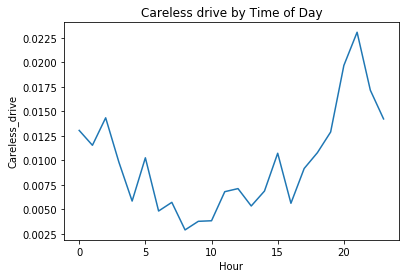

In [140]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_careless_drive)

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Careless_drive')
plt.title('Careless drive by Time of Day')

# Display the plot
plt.show()

stop_datetime
2012-12-31    0.006983
2013-12-31    0.006738
2014-12-31    0.007822
2015-12-31    0.007930
2016-12-31    0.009725
Name: careless_drive, dtype: float64


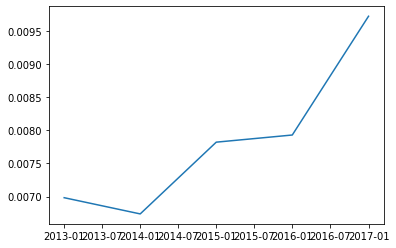

In [141]:
# Calculate the annual rate of careless_drive
print(ri.careless_drive.resample('A').mean())

# Save the annual rate of careless_drive
annual_careless_drive = ri.careless_drive.resample('A').mean()

# Create a line plot of 'annual_careless_drive'
plt.plot(annual_careless_drive)

# Display the plot
plt.show()

In [149]:
# Create a frequency table of districts and violations
age_violation = pd.crosstab(ri.subject_age,ri.violation)
print(age_violation)


violation    Alter Deface Offic Traf Cont Sign Device  \
subject_age                                             
11                                                  0   
12                                                  0   
13                                                  0   
14                                                  0   
15                                                  0   
...                                               ...   
94                                                  0   
95                                                  0   
96                                                  0   
99                                                  0   
100                                                 0   

violation    Alteration of Suspension System.  \
subject_age                                     
11                                          0   
12                                          0   
13                                          0   
14           

In [162]:
# Select rows age 19 to 30
young_violation = age_violation.loc['19':'30']
print(young_violation)

violation    Alter Deface Offic Traf Cont Sign Device  \
subject_age                                             
19                                                  0   
20                                                  0   
21                                                  0   
22                                                  0   
23                                                  0   
24                                                  0   
25                                                  0   
26                                                  0   
27                                                  0   
28                                                  0   
29                                                  0   
30                                                  0   

violation    Alteration of Suspension System.  \
subject_age                                     
19                                          0   
20                                          0   
21   

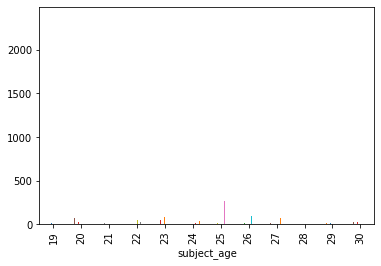

In [197]:
# Create a bar plot of younger violation
young_violation.plot(kind='bar',legend=False)
plt.show()
